In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Orden de procesamiento:  
- Unir todos los archivos_1
- A partir de archivos_1 unir New_db_2
- Selección de categorías a partir de los 1
- Crear data frame con téctnica (Unir con buffer, hacer el PU Baggind, KNN)

In [2]:
pirange_1 = pd.read_csv('PIRange_1')
rosetta_mean_1 = pd.read_csv('rosetta_mean_1')
soilmaps_mean_1 = pd.read_csv('soilmaps_mean_1')
textural_classes_1 = pd.read_csv('textural_classes_1')
db = pd.read_csv('New_DB_2.csv')

In [ ]:
textural_classes_1 = textural_classes_1.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
rosetta_mean_1 = rosetta_mean_1.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
soilmaps_mean_1 = soilmaps_mean_1.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
pirange_1 = pirange_1.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [14]:
def plot_corr_map(df: pd.DataFrame):
    plt.figure(figsize=(15,14))
    heatmap = sns.heatmap(df.corr(), annot=True, cmap='pink_r')
    heatmap.set_title('Mapa de correlación')
    plt.show()

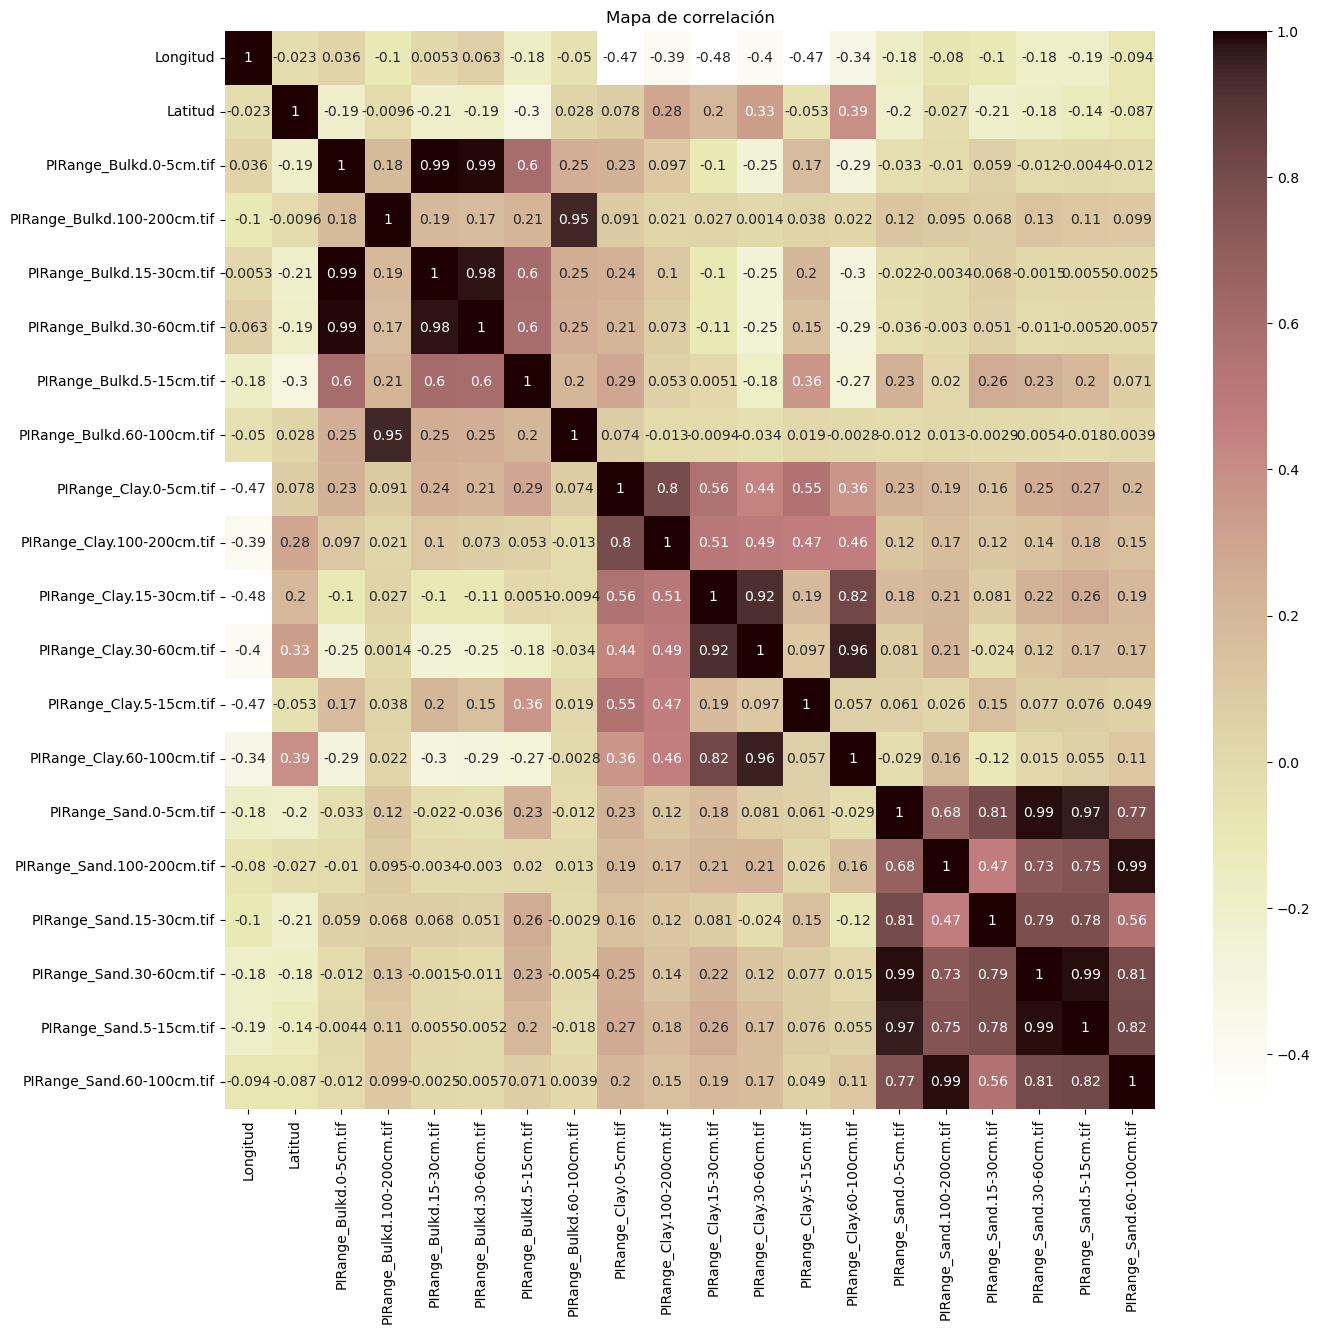

In [15]:
plot_corr_map(pirange_1)

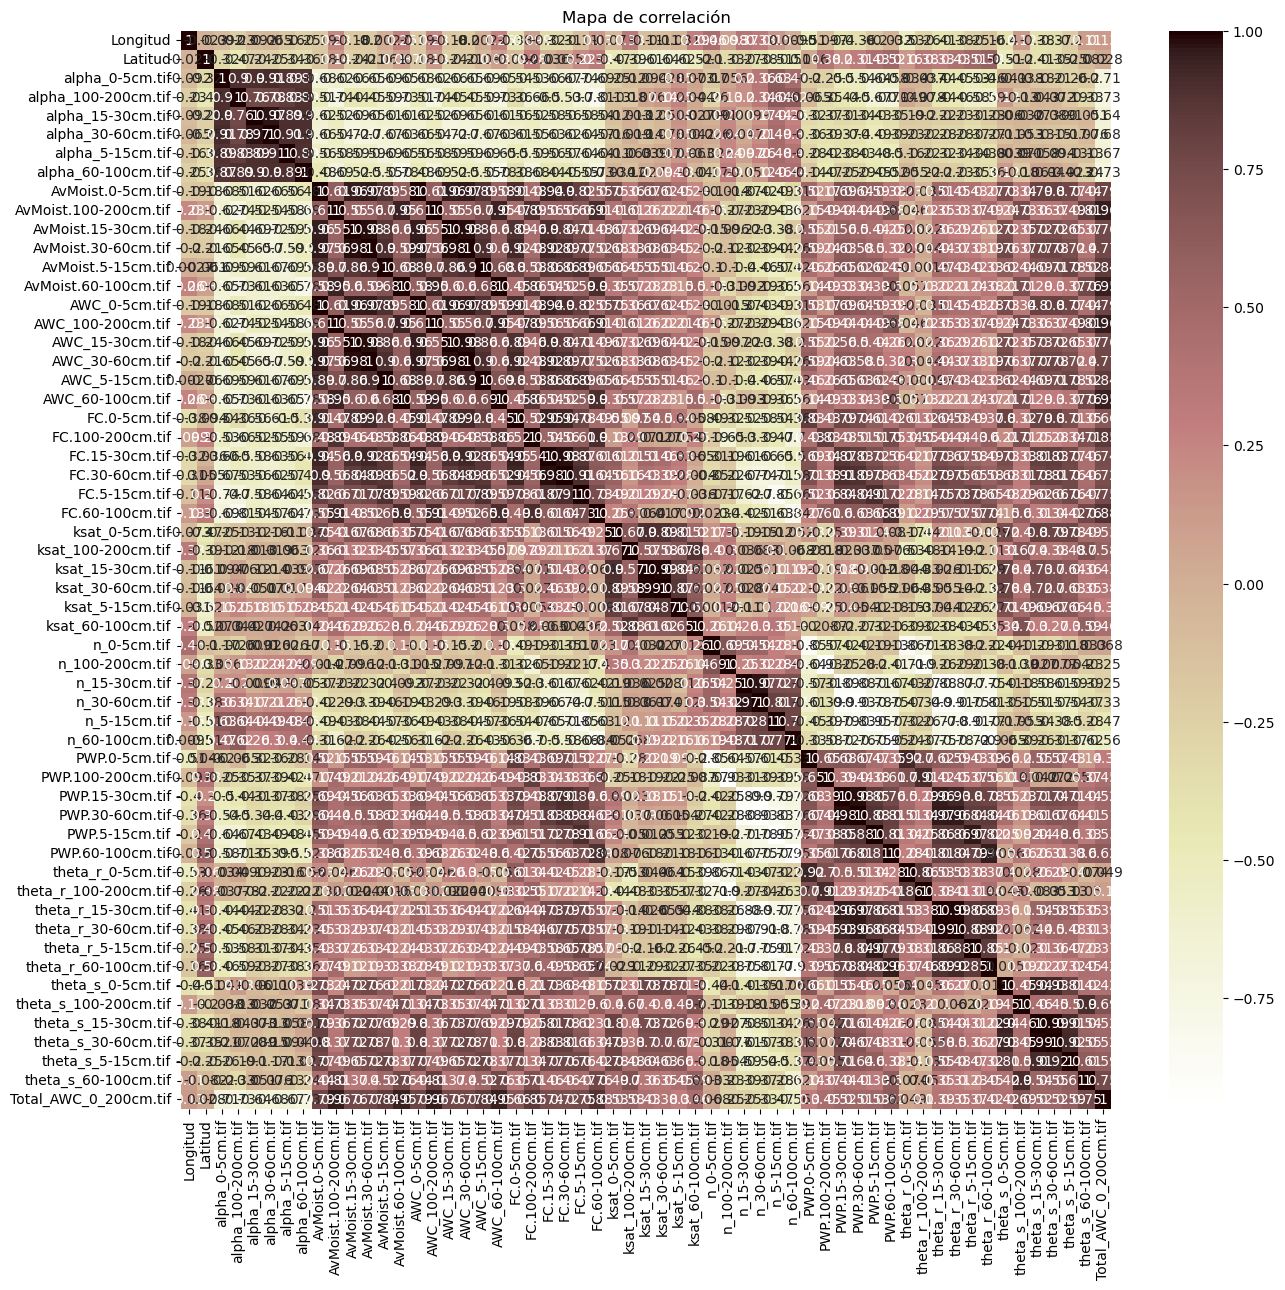

In [19]:
plot_corr_map(rosetta_mean_1)

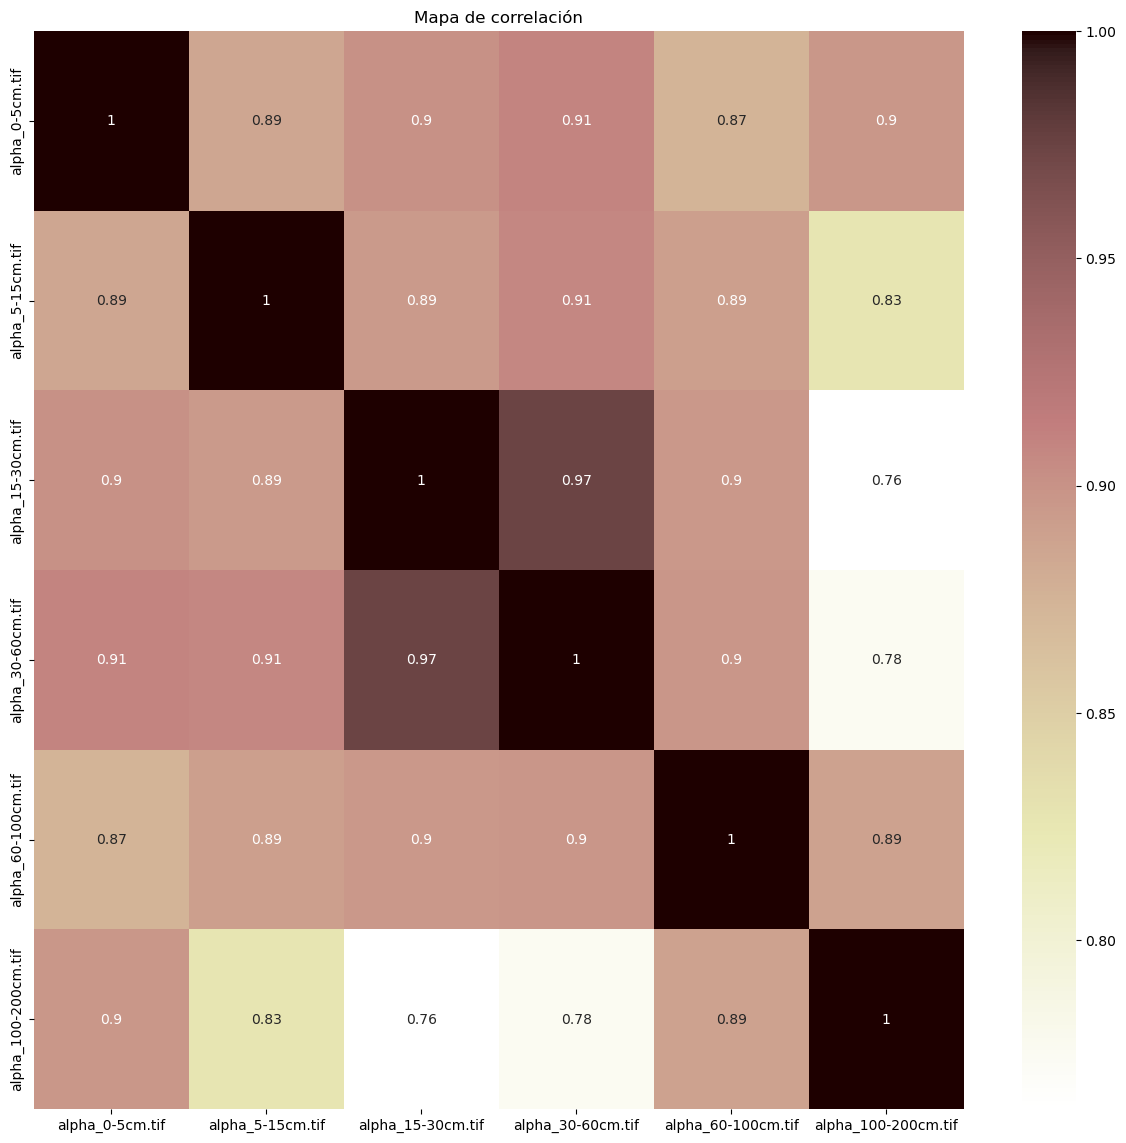

In [266]:
cols = ['alpha_0-5cm.tif', 'alpha_5-15cm.tif', 'alpha_15-30cm.tif', 'alpha_30-60cm.tif', 'alpha_60-100cm.tif', 'alpha_100-200cm.tif']
plot_corr_map(rosetta_mean_1[cols])

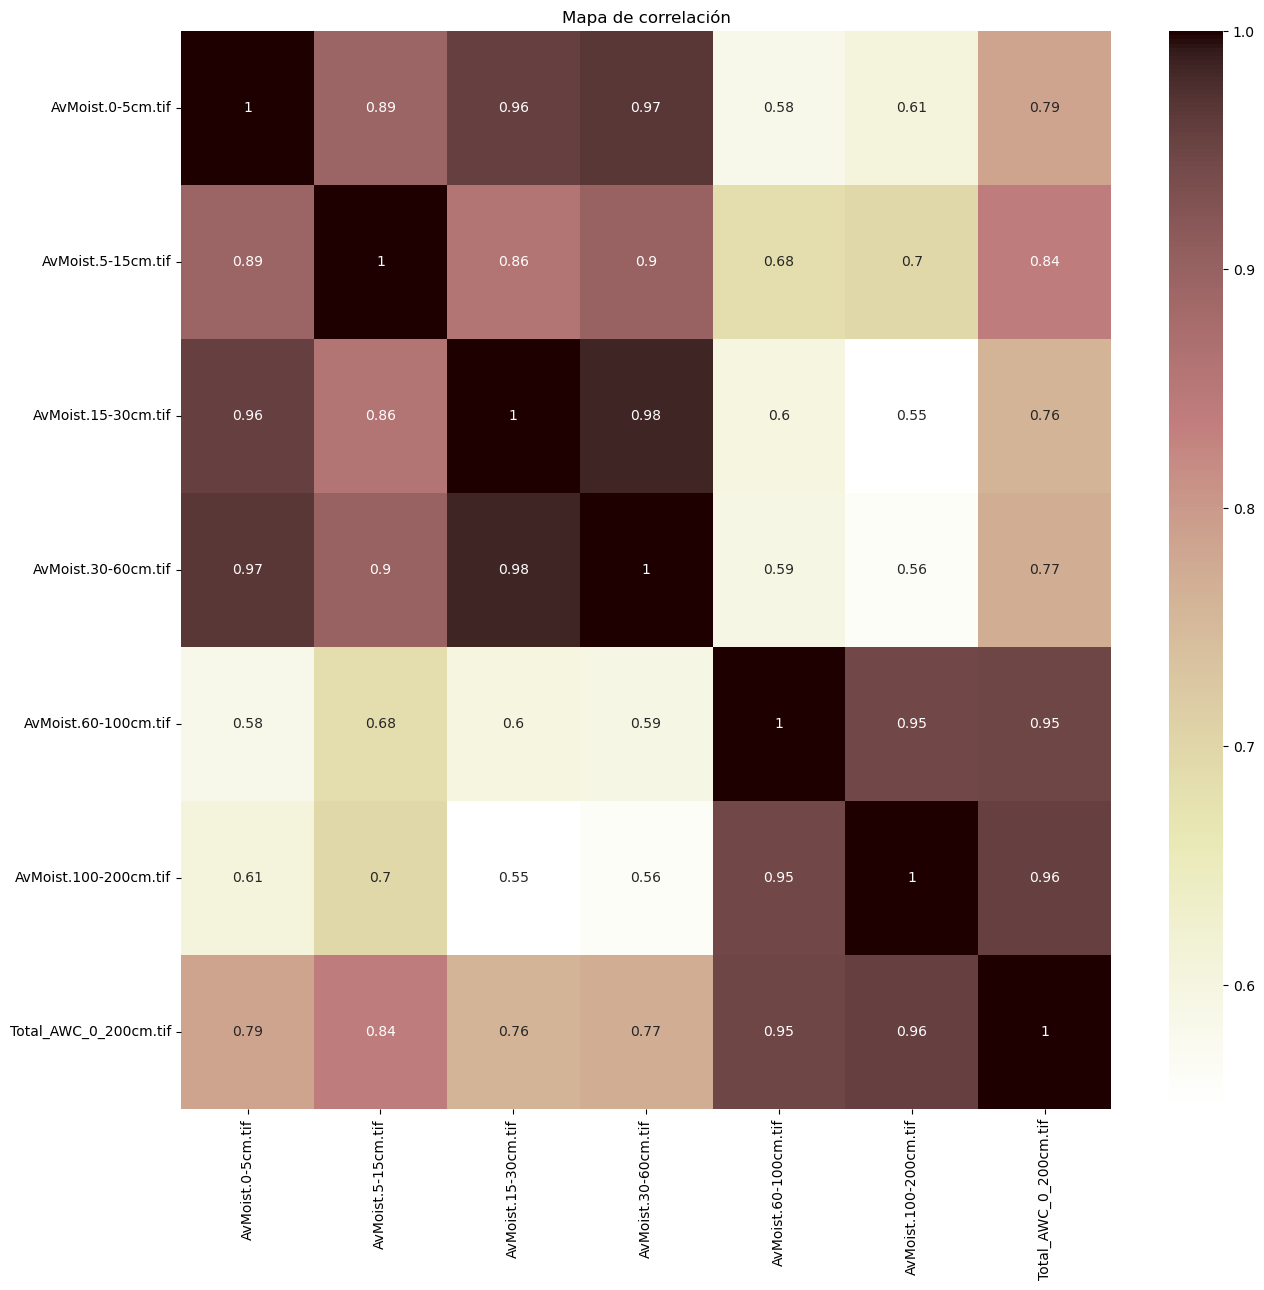

In [268]:
cols = ['AvMoist.0-5cm.tif', 'AvMoist.5-15cm.tif', 'AvMoist.15-30cm.tif', 'AvMoist.30-60cm.tif', 'AvMoist.60-100cm.tif', 'AvMoist.100-200cm.tif', 'Total_AWC_0_200cm.tif']
plot_corr_map(rosetta_mean_1[cols])

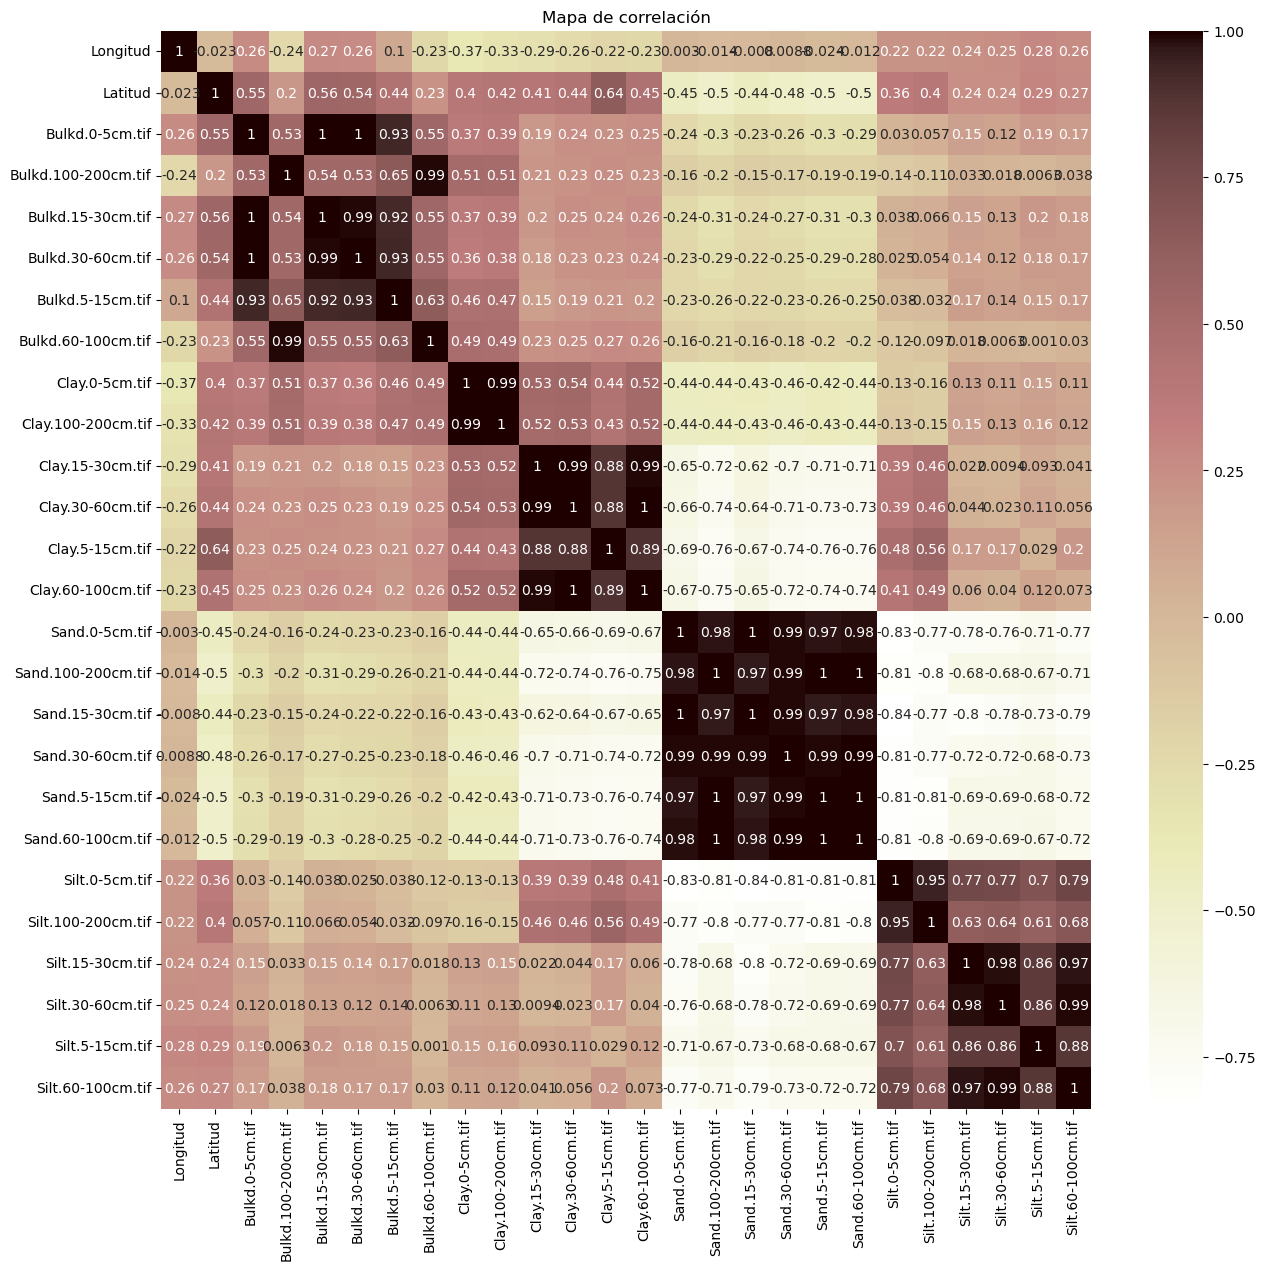

In [23]:
plot_corr_map(soilmaps_mean_1)

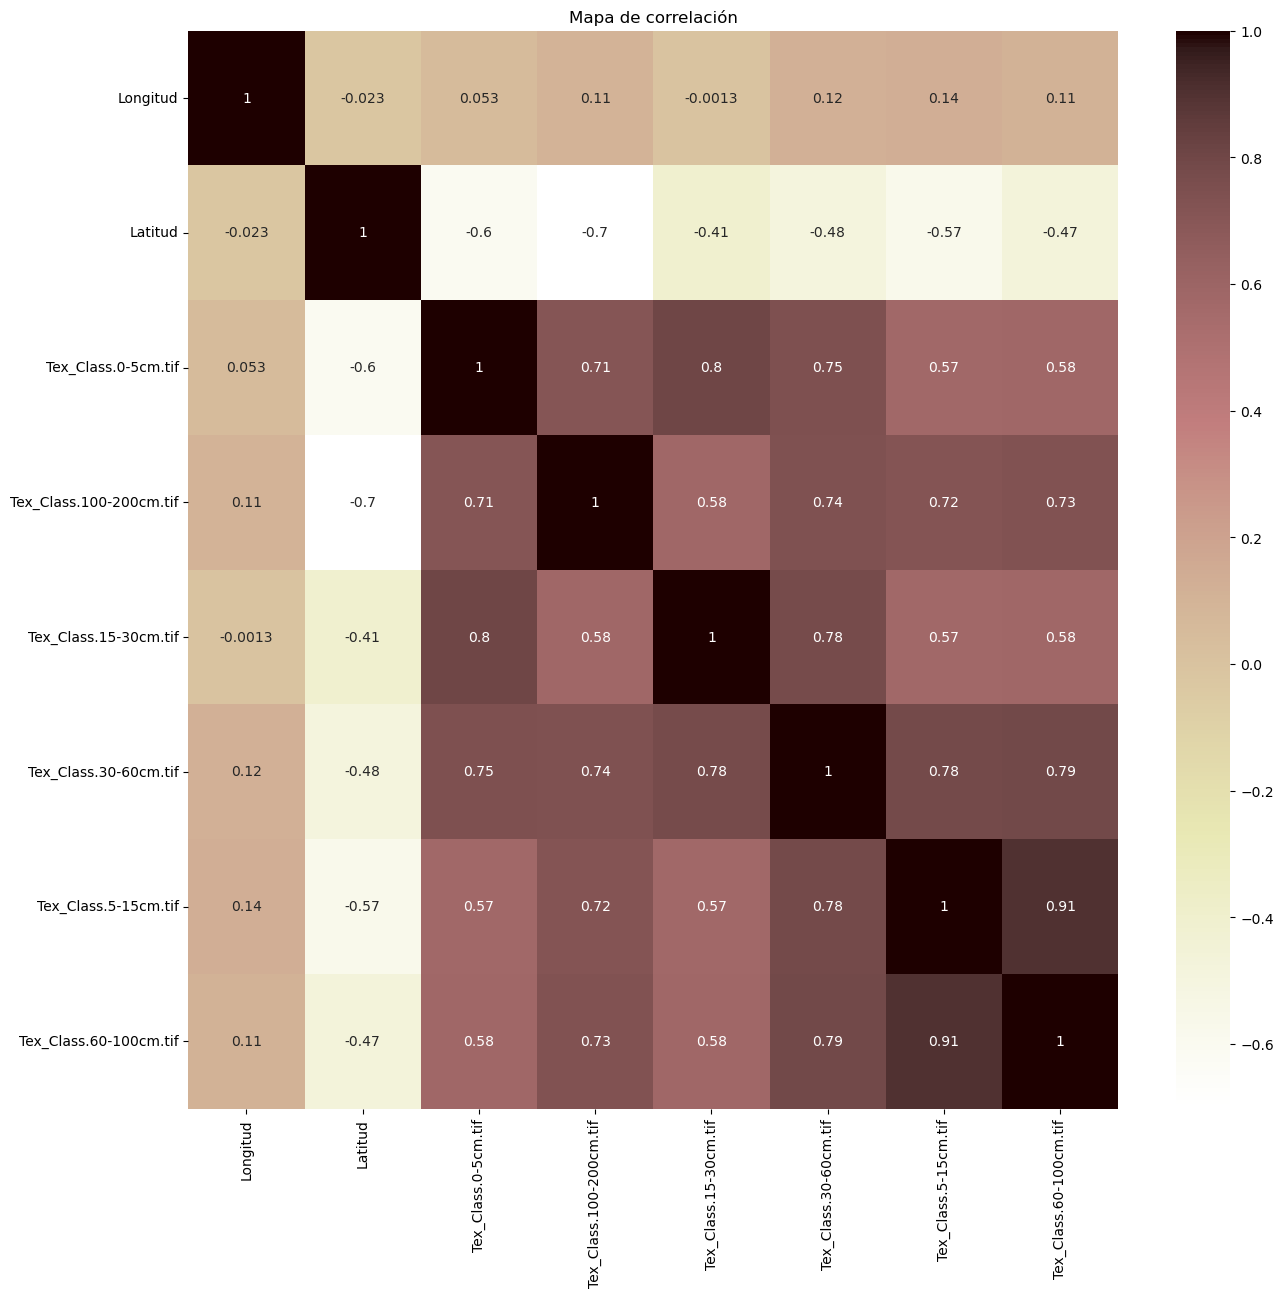

In [25]:
plot_corr_map(textural_classes_1)

In [175]:
data_0 = pd.read_csv('tif_data_0_01')
data_0['Valor'] = 0
data_1 = soilmaps_mean_1
data_1['Valor'] = 1

In [176]:
#final_df = pd.merge(df, db, on=['Latitud', 'Longitud', 'Fecha Evento'], how='inner')

In [177]:
data_0 = data_0.drop_duplicates()
print(data_0.shape)

(1247, 144)


In [178]:
#data_1 = data_1.drop(columns=['Unnamed: 0'])
#data_0 = data_0.drop(columns=['Unnamed: 0_x'])

In [179]:
print(data_0.columns, data_1.columns)

Index(['Unnamed: 0', 'Región', 'Comuna', 'Tipo Remoción en masa',
       'Factor desencadenante', 'Fecha Evento', 'Longitud', 'Latitud',
       'Sistema Georeferencia', 'Cota (m.s.n.m)',
       ...
       'Silt.30-60cm.tif', 'Silt.5-15cm.tif', 'Silt.60-100cm.tif',
       'Tex_Class.0-5cm.tif', 'Tex_Class.100-200cm.tif',
       'Tex_Class.15-30cm.tif', 'Tex_Class.30-60cm.tif',
       'Tex_Class.5-15cm.tif', 'Tex_Class.60-100cm.tif', 'Valor'],
      dtype='object', length=144) Index(['Longitud', 'Latitud', 'Bulkd.0-5cm.tif', 'Bulkd.100-200cm.tif',
       'Bulkd.15-30cm.tif', 'Bulkd.30-60cm.tif', 'Bulkd.5-15cm.tif',
       'Bulkd.60-100cm.tif', 'Clay.0-5cm.tif', 'Clay.100-200cm.tif',
       'Clay.15-30cm.tif', 'Clay.30-60cm.tif', 'Clay.5-15cm.tif',
       'Clay.60-100cm.tif', 'Sand.0-5cm.tif', 'Sand.100-200cm.tif',
       'Sand.15-30cm.tif', 'Sand.30-60cm.tif', 'Sand.5-15cm.tif',
       'Sand.60-100cm.tif', 'Silt.0-5cm.tif', 'Silt.100-200cm.tif',
       'Silt.15-30cm.tif', 'Silt.30-60cm.t

In [180]:
data_0 = data_0.rename(columns={'Fecha Evento_y': 'Fecha Evento'})

In [181]:
columns = ['Latitud','Longitud','Bulkd.0-5cm.tif', 'Clay.0-5cm.tif', 'Sand.0-5cm.tif', 'Valor']
data_0 = data_0[columns]
data_1 = data_1[columns]

In [182]:
data_0 = pd.merge(data_0, db, on=['Latitud', 'Longitud', 'Valor'], how='inner')
data_1 = pd.merge(data_1, db, on=['Latitud', 'Longitud', 'Valor'], how='inner')

In [183]:
def rename_columns(df):
    # Crear una lista con los nombres de las columnas renombradas
    new_columns = []
    for col in df.columns:
        if col.endswith('_x') or col.endswith('_y'):
            new_columns.append(col[:-2])
        else:
            new_columns.append(col)
    
    # Renombrar las columnas del DataFrame
    df.columns = new_columns

    return df

In [184]:
#data_0 = rename_columns(data_0)
#data_1 = rename_columns(data_1)

In [185]:
data_0.columns

Index(['Latitud', 'Longitud', 'Bulkd.0-5cm.tif', 'Clay.0-5cm.tif',
       'Sand.0-5cm.tif', 'Valor', 'Región', 'Comuna', 'Factor desencadenante',
       'Sistema Georeferencia', 'Cota (m.s.n.m)', 'PP', 'valor_humedad_suelo1',
       'valor_humedad_suelo2', 'valor_humedad_suelo3', 'valor_humedad_suelo4',
       'Fecha Evento', 'Tipo Remoción en masa', 'Unnamed: 0', 'slope'],
      dtype='object')

In [186]:
data_1.columns

Index(['Latitud', 'Longitud', 'Bulkd.0-5cm.tif', 'Clay.0-5cm.tif',
       'Sand.0-5cm.tif', 'Valor', 'Región', 'Comuna', 'Factor desencadenante',
       'Sistema Georeferencia', 'Cota (m.s.n.m)', 'PP', 'valor_humedad_suelo1',
       'valor_humedad_suelo2', 'valor_humedad_suelo3', 'valor_humedad_suelo4',
       'Fecha Evento', 'Tipo Remoción en masa', 'Unnamed: 0', 'slope'],
      dtype='object')

In [210]:
cols = [ 'Bulkd.0-5cm.tif',
 'Clay.0-5cm.tif',
 'Sand.0-5cm.tif',
 'PP',
 'valor_humedad_suelo1',
 'valor_humedad_suelo2',
 'valor_humedad_suelo3',
 'valor_humedad_suelo4',
 'slope']

In [212]:
data_0 = data_0.drop_duplicates()
data_1 = data_1.drop_duplicates()
print(data_0.shape, data_1.shape)

(533, 20) (458, 20)


In [213]:
data = pd.concat([data_0, data_1])
data

,Latitud,Longitud,Bulkd.0-5cm.tif,Clay.0-5cm.tif,Sand.0-5cm.tif,Valor,Región,Comuna,Factor desencadenante,Sistema Georeferencia,Cota (m.s.n.m),PP,valor_humedad_suelo1,valor_humedad_suelo2,valor_humedad_suelo3,valor_humedad_suelo4,Fecha Evento,Tipo Remoción en masa,Unnamed: 0,slope
0,-42.4586,-73.7755,0.798,21.662001,49.104000,0,Los Lagos,Castro,Precipitaciones,WGS 84- UTM 18 S,-,11.358299,0.460907,0.417099,0.387939,0.410934,07/03/2001,Flujo,1247.0,37.616885
1,-42.4586,-73.7755,0.798,21.662001,49.104000,0,Los Lagos,Castro,Precipitaciones,WGS 84- UTM 18 S,-,282.989359,0.467758,0.467758,0.466522,0.425278,09/03/2001,Flujo,1248.0,37.616885
4,-42.3987,-72.6883,0.965,13.764000,73.561996,0,Los Lagos,Chaitén,Precipitaciones,WGS 84- UTM 18 S,-,88.743122,0.436966,0.437408,0.438400,0.438980,03/05/2002,Deslizamiento,1249.0,57.405164
5,-40.6983,-73.7789,0.646,11.912000,44.269001,0,Los Lagos,Río Negro,Precipitaciones,WGS 84- UTM 18 S,6,101.366892,0.515045,0.513718,0.519211,0.517426,09/08/2002,Deslizamiento,1250.0,37.844912
6,-40.5650,-73.5947,0.617,16.195000,56.752998,0,Los Lagos,Osorno,Precipitaciones,WGS 84- UTM 18 S,126,0.000000,0.478531,0.480499,0.477859,0.500580,22/08/2007,Deslizamiento,1251.0,42.977906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,-36.7420,-73.0065,1.323,34.469002,41.840000,1,Biobío,Penco,Precipitaciones,WGS 84/ UTM 18 S,52,28.563241,0.408554,0.385147,0.398972,0.396698,12/08/2006,Deslizamiento,1236.0,29.928362
564,-36.9247,-73.0130,1.292,29.528000,44.585999,1,Biobío,Chiguayante,Precipitaciones,WGS 84/ UTM 18 S,50,12.244763,0.516968,0.506775,0.509216,0.511200,09/07/2006,Deslizamiento,1237.0,48.232759
565,-36.9247,-73.0130,1.292,29.528000,44.585999,1,Biobío,Chiguayante,Precipitaciones,WGS 84/ UTM 18 S,50,328.705409,0.519699,0.518951,0.518845,0.519943,11/07/2006,Deslizamiento,1240.0,48.232759
569,-36.5932,-72.9781,1.384,21.320999,62.102001,1,Biobío,Tomé,Precipitaciones,WGS 84/ UTM 18 S,40,6.876428,NaN,NaN,NaN,NaN,09/07/2006,Deslizamiento,1239.0,36.674431


In [214]:
data_y = data['Valor']
data = data.drop(columns=['Valor', 'Unnamed: 0'])

In [215]:
data = data[cols]

In [216]:
data = data.fillna(data.mean())
data

,Bulkd.0-5cm.tif,Clay.0-5cm.tif,Sand.0-5cm.tif,PP,valor_humedad_suelo1,valor_humedad_suelo2,valor_humedad_suelo3,valor_humedad_suelo4,slope
0,0.798,21.662001,49.104000,11.358299,0.460907,0.417099,0.387939,0.410934,37.616885
1,0.798,21.662001,49.104000,282.989359,0.467758,0.467758,0.466522,0.425278,37.616885
4,0.965,13.764000,73.561996,88.743122,0.436966,0.437408,0.438400,0.438980,57.405164
5,0.646,11.912000,44.269001,101.366892,0.515045,0.513718,0.519211,0.517426,37.844912
6,0.617,16.195000,56.752998,0.000000,0.478531,0.480499,0.477859,0.500580,42.977906
...,...,...,...,...,...,...,...,...,...
559,1.323,34.469002,41.840000,28.563241,0.408554,0.385147,0.398972,0.396698,29.928362
564,1.292,29.528000,44.585999,12.244763,0.516968,0.506775,0.509216,0.511200,48.232759
565,1.292,29.528000,44.585999,328.705409,0.519699,0.518951,0.518845,0.519943,48.232759
569,1.384,21.320999,62.102001,6.876428,0.433032,0.423390,0.407551,0.410248,36.674431


In [225]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 1.0, 10.0]
}

X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size=0.1)
print(f'Numero de entrenamiendo: {X_train.shape}, Numero de test: {X_test.shape}')
model = XGBClassifier()
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=50, scoring='accuracy', cv=5, verbose=1, random_state=42)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Precisión de {acc*100}')


Numero de entrenamiendo: (891, 9), Numero de test: (100, 9)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Precisión de 81.0


In [230]:
data_1 = data_1[cols]
data_0 = data_0[cols]

In [237]:
data_1 = data_1.fillna(data_1.mean())
data_0 = data_0.fillna(data_0.mean())

In [245]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

class PUBagging:
    def __init__(self, num_iterations=10, sample_ratio=1.0, random_state=None):
        self.num_iterations = num_iterations
        self.sample_ratio = sample_ratio
        self.random_state = random_state
        self.classifiers = []
        self.probabilities = None

    def fit(self, landslide_samples, unlabeled_samples):
        np.random.seed(self.random_state)

        if isinstance(landslide_samples, np.ndarray):
            landslide_samples_array = landslide_samples
        else:
            landslide_samples_array = landslide_samples.values  # Convert to numpy array if it's a DataFrame

        if isinstance(unlabeled_samples, np.ndarray):
            unlabeled_samples_array = unlabeled_samples
        else:
            unlabeled_samples_array = unlabeled_samples.values  # Convert to numpy array if it's a DataFrame

        num_samples = len(landslide_samples_array)
        num_unlabeled = len(unlabeled_samples_array)

        for _ in range(self.num_iterations):
            # Step 1: Sample equal number of unlabeled samples as non-landslide samples
            non_landslide_indices = np.random.choice(num_unlabeled, size=int(num_samples * self.sample_ratio), replace=False)
            non_landslide_samples = unlabeled_samples_array[non_landslide_indices]

            # Combine with landslide samples to form training set
            X_train = np.vstack((landslide_samples_array, non_landslide_samples))
            y_train = np.hstack((np.ones(num_samples), np.zeros(len(non_landslide_samples))))

            # Step 2: Train decision tree classifier
            clf = DecisionTreeClassifier(random_state=self.random_state)
            clf.fit(X_train, y_train)
            self.classifiers.append(clf)

            # Step 3: Predict probability of being landslide for unlabeled samples
            prob_landslide = clf.predict_proba(unlabeled_samples_array)[:, 1]

            if self.probabilities is None:
                self.probabilities = prob_landslide
            else:
                self.probabilities += prob_landslide

        # Step 4: Average probabilities over iterations
        self.probabilities /= self.num_iterations

    def predict_proba(self, unlabeled_samples):
        if isinstance(unlabeled_samples, np.ndarray):
            return self.probabilities
        else:
            return self.probabilities[:len(unlabeled_samples)]  # Return probabilities for original DataFrame

# Example usage:
if __name__ == '__main__':
    import pandas as pd
    
    # Example data (replace with your own data)
    landslide_samples = data_1  # Example landslide samples as DataFrame
    unlabeled_samples = data_0# Example unlabeled samples as DataFrame

    # Create PU Bagging instance
    pu_bagging = PUBagging(num_iterations=5, sample_ratio=0.5, random_state=42)

    # Fit the model
    pu_bagging.fit(landslide_samples, unlabeled_samples)

    # Predict probabilities for unlabeled samples
    probabilities = pu_bagging.predict_proba(unlabeled_samples)
    print("Predicted probabilities:", probabilities)


Predicted probabilities: [0.  0.4 0.4 0.  0.4 0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.
 0.  0.2 0.2 0.4 0.  0.  0.  0.4 0.  0.4 0.  0.  0.  0.  0.  0.  0.  0.2
 0.4 0.  0.  0.2 0.  0.2 0.  0.2 0.  0.6 0.  0.  0.6 0.4 0.2 0.6 0.6 0.
 0.4 0.  0.  0.  0.  0.  0.  0.  0.  0.4 0.  0.4 0.4 0.  0.  0.2 0.2 0.6
 0.  0.  0.  0.  0.  0.  0.  0.4 0.  0.  0.  1.  0.6 0.2 0.2 0.2 0.2 0.8
 0.2 0.2 0.4 0.  0.  0.2 0.2 0.4 0.  0.  0.2 0.  0.4 0.  0.2 1.  0.4 0.4
 0.6 0.4 0.4 0.4 0.2 0.4 0.6 0.2 0.2 0.  0.6 0.  0.  0.  0.  0.  0.  0.2
 0.  0.  0.  0.  0.  0.4 0.2 0.2 0.2 0.2 0.4 0.2 0.2 0.2 0.6 0.2 0.  0.
 0.  0.  0.4 0.2 0.  0.  0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.4 0.  0.4 0.  0.2 0.2 0.  0.4 0.  0.4 0.6 0.4 0.
 0.  0.6 0.  0.2 0.  0.  0.4 0.  0.  0.  0.  0.  0.4 0.2 0.2 0.  0.2 0.6
 0.2 0.6 0.6 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.2 0.2 0.2 0.2 0.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.4 0.  0.  0.  0.  0.  

In [248]:
# Suponiendo que ya tienes las probabilidades predichas por pu_bagging.predict_proba(unlabeled_samples)

# Umbral para seleccionar muestras no deslizamiento
threshold = 0.5  # Puedes ajustar este umbral según tus necesidades

# Filtrar muestras no deslizamiento por debajo del umbral
non_landslide_indices = np.where(probabilities < threshold)[0]
selected_non_landslide_samples = unlabeled_samples.iloc[non_landslide_indices]

# Ejemplo de cómo podrías utilizar las muestras seleccionadas
print("Muestras no deslizamiento seleccionadas:")
print(selected_non_landslide_samples)


Muestras no deslizamiento seleccionadas:
      Bulkd.0-5cm.tif  Clay.0-5cm.tif  Sand.0-5cm.tif          PP  \
0            0.798000       21.662001       49.104000   11.358299   
1            0.798000       21.662001       49.104000  282.989359   
4            0.965000       13.764000       73.561996   88.743122   
5            0.646000       11.912000       44.269001  101.366892   
6            0.617000       16.195000       56.752998    0.000000   
...               ...             ...             ...         ...   
1407         0.825997       18.909942       59.723000   33.056634   
1412         1.122000       24.135000       44.639000    3.830269   
1413         1.122000       24.135000       44.639000  327.677736   
1417         1.381000       28.506001       45.347000    6.876428   
1418         1.381000       28.506001       45.347000  329.135137   

      valor_humedad_suelo1  valor_humedad_suelo2  valor_humedad_suelo3  \
0                 0.460907              0.417099        

In [255]:
len(selected_non_landslide_samples)
len(data_1)

458

In [256]:
selected_non_landslide_samples['Valor'] = 0
data_1['Valor'] = 1

data = pd.concat([data_1, selected_non_landslide_samples])
data_y = data['Valor']
data = data.drop(columns=['Valor'])

C:\Users\Manuel\AppData\Local\Temp\ipykernel_26456\3756642305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_non_landslide_samples['Valor'] = 0


In [259]:
data.shape, data_y.shape

((950, 9), (950,))

In [260]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 1.0, 10.0]
}

X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size=0.2)
print(f'Numero de entrenamiendo: {X_train.shape}, Numero de test: {X_test.shape}')
model = XGBClassifier()
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=50, scoring='accuracy', cv=5, verbose=1, random_state=42)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Precisión de {acc*100}')


Numero de entrenamiendo: (760, 9), Numero de test: (190, 9)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Precisión de 87.89473684210526
